<a href="https://colab.research.google.com/github/rcpsilva/BCC342_Intro_to_Optimization/blob/main/TSP_with_PythonMIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mip

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
from sys import stdout as out
from mip import Model, xsum, minimize, BINARY, INTEGER

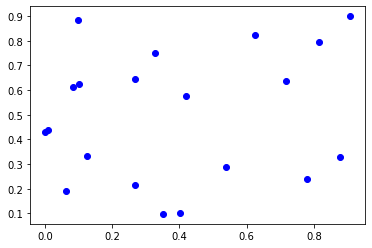

In [ ]:
n = 20
points = np.random.rand(n,2)

for p in points:
  plt.plot(p[0],p[1],'bo')

In [ ]:
dist_matrix = [[np.linalg.norm(np.array(p1)-np.array(p2)) for p1 in points] for p2 in points]

In [ ]:
n = len(points)
V = set(range(len(points)))

In [ ]:
model = Model()

In [ ]:
x = [[model.add_var(var_type=BINARY) for j in V] for i in V]
y = [model.add_var(var_type=INTEGER,lb=1,ub=n-1) for i in V] 

In [ ]:
model.objective = minimize(xsum(dist_matrix[i][j]*x[i][j] for i in V for j in V))

In [ ]:
for i in V:
  model += xsum(x[i][j] for j in V - {i}) == 1 

for j in V:
  model += xsum(x[i][j] for i in V - {j}) == 1 

for (i, j) in product(V - {0}, V - {0}):
  if i!=j:
    model += y[i] - y[j] + (n+1)*x[i][j] <= n


In [ ]:
model.optimize()

<OptimizationStatus.OPTIMAL: 0>

In [ ]:
for row in x:
  vals = [e.x for e in row]
  print(vals)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

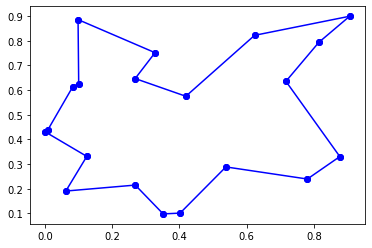

In [ ]:
for i in range(len(x)):
  for j in range(len(x)):
    if x[i][j].x == 1:
      plt.plot([points[i][0],points[j][0]],[points[i][1],points[j][1]],'bo-')

In [ ]:
def brute_force(fobj,n,m,partial_solution=[],best_solution=[],best_val=np.inf,print_sol=False):

  if len(partial_solution) == n:
    
    fx = fobj(partial_solution)
    
    if print_sol:
      print('{} : {}'.format(partial_solution,fx))

    if fx <= best_val:
      best_solution = partial_solution
      best_val = fx

    return best_solution,best_val
  
  else:
    for e in np.arange(m):
      best_solution,best_val = brute_force(fobj,n,m,partial_solution + [e],
                best_solution,
                best_val,
                print_sol)
    
    return best_solution,best_val


In [ ]:
def brute_force_perm(fobj,n,partial_solution=[],best_solution=[],best_val=np.inf,print_sol=False):

  if len(partial_solution) == n:
    
    fx = fobj(partial_solution)
    
    if print_sol:
      print('{} : {}'.format(partial_solution,fx))

    if fx <= best_val:
      best_solution = partial_solution
      best_val = fx

    return best_solution,best_val
  
  else:
    for e in set(np.arange(n)).difference(set(partial_solution)):
      best_solution,best_val = brute_force_perm(fobj,n,partial_solution + [e],
                best_solution,
                best_val,
                print_sol)
    
    return best_solution,best_val


In [ ]:
# [0,1,2,3,4]
def tsp_perm(x):
  sum = 0
  for i in range(len(x)):
    sum += np.linalg.norm(points[x[i]] - points[x[(i+1)%len(x)]])

  return sum

In [ ]:
best_solution,best_val = brute_force_perm(tsp_perm,n,print_sol=False)
best_solution,best_val

In [ ]:
for i in range(len(best_solution)):
  px = [points[best_solution[i]][0],points[best_solution[(i+1)%len(best_solution)]][0]]
  py = [points[best_solution[i]][1],points[best_solution[(i+1)%len(best_solution)]][1]]
  
  plt.plot(px,py,'o-')